## Luther Challenges from Graham Anderson
Notes

In [152]:
#%matplotlib inline
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")


Populating the interactive namespace from numpy and matplotlib


In [1]:
df = pd.read_csv('./src/2013_movies.csv')
df['ReleaseDate'] =  pd.to_datetime(df['ReleaseDate'], )
#df['Year']= pd.DatetimeIndex(df['ReleaseDate']).year
df['Month'] = df.ReleaseDate.dt.month
df['Year'] = df.ReleaseDate.dt.year
df['Day'] = df.ReleaseDate.dt.day
df.sort(['ReleaseDate']) 
df.tail()



//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:13: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,Month,Year
95,Rush,38000000,26947624,Ron Howard,R,123,2013-09-20,9,2013
96,The Host,40000000,26627201,Andrew Niccol,PG-13,125,2013-03-29,3,2013
97,The World's End,20000000,26004851,Edgar Wright,R,109,2013-08-23,8,2013
98,21 and Over,13000000,25682380,Jon LucasScott Moore,R,93,2013-03-01,3,2013
99,Her,23000000,25568251,Spike Jonze,R,120,2013-12-18,12,2013


In [38]:
df['Rating'].value_counts()

PG-13    47
R        37
PG       15
G         1
Name: Rating, dtype: int64

### Challenge 1: Plot domestic total gross over time.

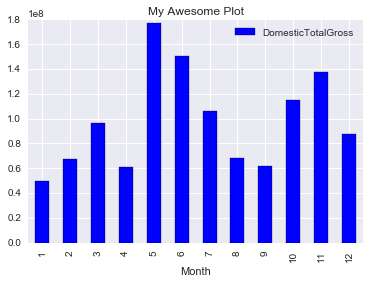

In [8]:
newdf = df[['Month','DomesticTotalGross']].groupby('Month').mean()
ax = newdf.plot(kind='bar')
ax.set_title('My Awesome Plot')

### Challenge 2:  Plot runtime vs. domestic total gross.

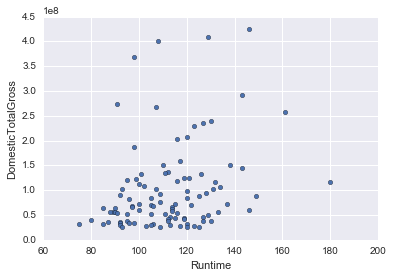

In [3]:
df.plot(kind='scatter',y='DomesticTotalGross', x='Runtime')

### Challenge 3: Group your data by Rating and find the average runtime and domestic total gross at each level of Rating

In [144]:
runtime_groupby = df.groupby(by=['Rating'])['Runtime'].mean()
runtime_groupby

Rating
G        107.000000
PG        99.933333
PG-13    117.510638
R        110.729730
Name: Runtime, dtype: float64

In [145]:
dtg_groupby = df.groupby(by=['Rating'])['DomesticTotalGross'].sum()
dtg_groupby

Rating
G         268492764
PG       1967035741
PG-13    5238139144
R        2586019873
Name: DomesticTotalGross, dtype: int64

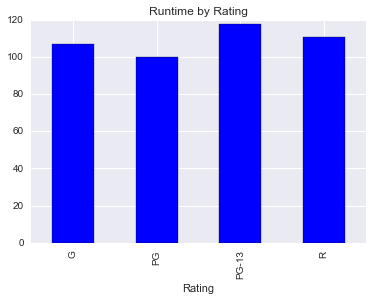

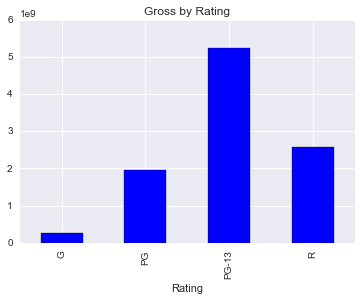

In [162]:
runtime_groupby = df.groupby(by=['Rating'])['Runtime'].mean()
runtime_groupby.plot(kind='bar', title='Runtime by Rating') 
plt.show()

dtg_groupby = df.groupby(by=['Rating'])['DomesticTotalGross'].sum()
dtg_groupby.plot(kind='bar', title='Gross by Rating')
plt.show()




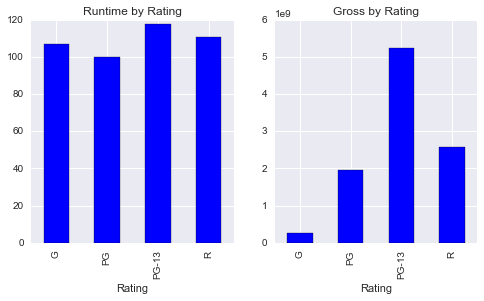

In [169]:
fig, axs = plt.subplots(1,2)
fig.set_size_inches(8,4)

runtime_groupby = df.groupby(by=['Rating'])['Runtime'].mean()
runtime_groupby.plot(kind='bar', ax=axs[0], title='Runtime by Rating') 


dtg_groupby = df.groupby(by=['Rating'])['DomesticTotalGross'].sum()
dtg_groupby.plot(kind='bar', ax=axs[1], title='Gross by Rating')

plt.show()



### Challenge 4:  Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.

In [87]:
df.head(1)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,Month,Year
0,The Hunger Games: Catching Fire,130000000,424668047,Francis Lawrence,PG-13,146,2013-11-22,11,2013


In [88]:
df.dtypes

Title                         object
Budget                       float64
DomesticTotalGross             int64
Director                      object
Rating                        object
Runtime                        int64
ReleaseDate           datetime64[ns]
Month                          int64
Year                           int64
dtype: object

//anaconda/lib/python3.5/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=735040.0, right=735040.0
  'left=%s, right=%s') % (left, right))


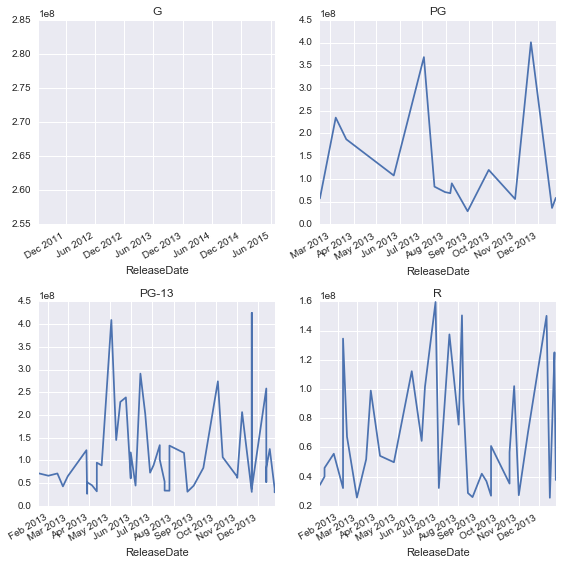

In [105]:
# (df[['Rating','ReleaseDate','DomesticTotalGross']]
#  .groupby('Rating')
#  .plot('ReleaseDate', 
#        'DomesticTotalGross',
#        subplots=True)
#  )

f, axList = plt.subplots(nrows=2, ncols=2)
f.set_size_inches(8,8)

for ax, (rating,dat) in zip(axList.flatten(), df.groupby('Rating')):
    dat.plot('ReleaseDate','DomesticTotalGross', ax=ax, legend=False)
    ax.set_title(rating)
    
plt.tight_layout()

### Slightly Different Syntax––Same Result

//anaconda/lib/python3.5/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=735040.0, right=735040.0
  'left=%s, right=%s') % (left, right))


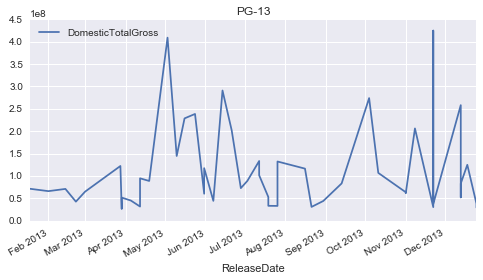

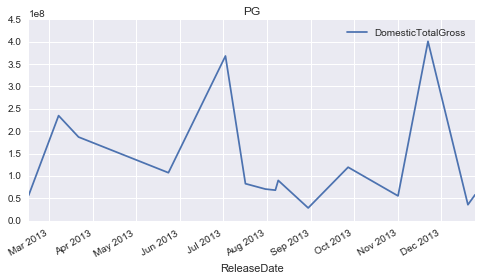

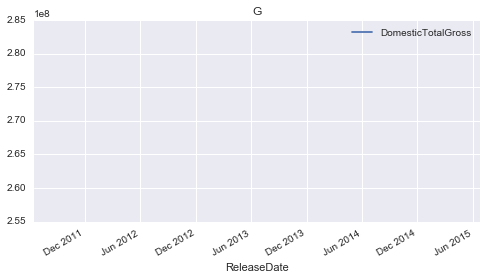

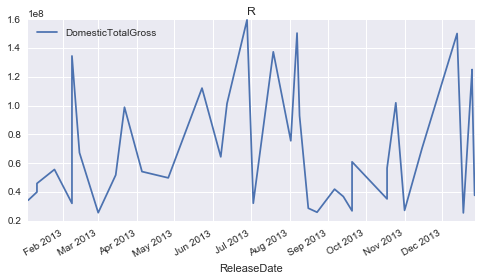

In [137]:
import seaborn as sns


mpaa = df['Rating'].unique()
for i in mpaa:
    (
        df[df['Rating']== i ][['ReleaseDate','DomesticTotalGross']].
        plot(title = i,kind="line", x='ReleaseDate', y='DomesticTotalGross')
     )



### Challenge 5: What director in your dataset has the highest gross per movie?

In [102]:
director = df['Director'][df['DomesticTotalGross'].idxmax()]
director

'Francis Lawrence'

### Challenge 6: Bin your dataset into months and make a bar graph of the mean domestic total gross by month. Error bars will represent the standard error of the mean.
Title of graph should include: Mean Domestic Total Gross by Month in 2013
Topic for consideration: what is the correct formula for the standard error of the mean? Examine the error bars and see if they are "reasonable."

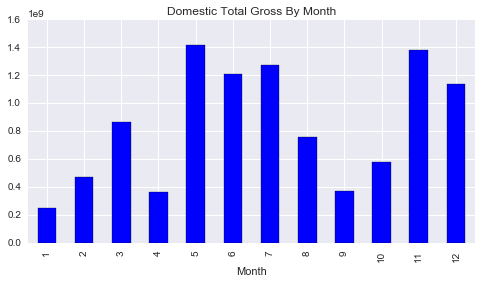

In [104]:
dtg_month = df.groupby(by=['Month'])['DomesticTotalGross'].sum()
ax2 = dtg_month.plot(kind='bar', title='Domestic Total Gross By Month')